# 2 Nov 23 - Activity: Automated Signal Deconstruction & Reconstruction

We found that it was possible to use the Fourier transform to decompose the signal into its constituent frequencies. Later we will use this idea to build up the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (FFT) algorithm. For now, we will write everything out in full to mirror our analytical work.

We will start with the same signal as before, but then you will work with other signals to achieve a particular signal decomposition.

Recall that the sign was given by the square wave function:

$$V(t) = \begin{cases} 0 & \text{if } 0 \leq t \leq \frac{T}{2} \\ V_0 & \text{if } \frac{T}{2} < t \leq T \end{cases}$$

We define the approximate form of the signal using the complex form of the Fourier series:

$$V(t) = \sum_{-\infty}^{+\infty} c_n e^{i n \omega_0 t}$$

where $\omega_0 = \frac{2 \pi}{T_0}$ and $c_n$ is the Fourier coefficient given by:

$$c_n = \frac{1}{T_0} \int_{0}^{T_0} V(t) e^{-i n \omega_0 t} dt$$

Remember that we use the real $V(t)$ to compute the complex $c_n$. And once we have found the $c_n$ we can reconstruct the signal using the series expansion.

$$V(t) \approx V_{approx}(t) = \sum_{-N}^{+N} c_n e^{i n \omega_0 t}$$

where $N$ is the number of terms we use in the series expansion.

## Analytical Calculation

**&#9989; Do this**

1. Take the signal $V(t)$ and determine which integrals you have to do.
2. Construct the integrals you need to do (over what cycle are you integrating?).
3. Perform the integrals (consider using `sympy`) and find the coefficients $c_n$'s.
4. Write the function $V(t)$ in terms of the $c_n$'s. (What about the imaginary part?)

## Automating the Calculation

This is a lot of work to do by hand, and we have to perform new integrals every time we want to find this decomposition. We can automate this process using a little code. We have to break the process up into a few steps.

1. Define the signal $V(t)$. 
    * Here you need to make sure you have a function that can be evaluated for any $t$. 
    * You should also be able to change that function easily for different signals.
2. Compute the Fourier coefficient $c_n$ for a given $n$. 
    * Here you need to perform an integral of $V(t)e^{-i n \omega_0 t}$ over the period $T_0$. \
    * It would be good to use a builtin integrator like `numpy.trapz` or `scipy.integrate.quad` to do this. 
    * The documentation for numpy.trapz can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html) and the documentation for scipy.integrate.quad can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html).
3. Compute the approximation $V_{approx}(t)$ up to a given $N$.
    * Here you need a complex array to take on the approximate values for $V(t)$.
    * You will need to loop over the $n$ values and add the contribution from each $c_n$ to the array.
    * Return the real part of the array to get the approximation.

**&#9989; Do this**

1. Review the code scaffold below and make sure you understand what is happening.
2. Complete the code below to compute the Fourier coefficients $c_n$ for a given $n$.
3. Complete the code below to compute the approximation $V_{approx}(t)$ up to a given $N$.
4. Test your code with the provided signal and plot the approximation for different values of $N$.
5. Write function that plots your real and approximate signal on the same plot. 
6. Write a function that plots the magnitude of Fourier coefficients $c_n$ as a function of $n\omega_0$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# Compute the Fourier coefficient
def compute_cn(v, n, T, f0):
    omega = 2 * np.pi * f0
    x = np.linspace(0, T, len(v))
    cn = 1/T * np.trapz(v * np.exp(-1j * n * omega * x), x, 0.01)
    return cn

# Fourier series expansion using complex form
def complex_fourier_series_expansion(v, t, T, N):
    f0 = 1 / T
    series = np.zeros_like(t, dtype=complex)
    cns = np.zeros(2*N+1, dtype=complex)
    for n in range(-N, N+1, 1):
        series += compute_cn(v(t), n, T, f0) * np.exp(1j * n * 2 * np.pi * f0 * t)
        cns[n+N] = compute_cn(v(t), n, T, f0)
    return series.real, cns

# Define the square wave signal
T = 2 * np.pi  # Period
def v(t):
    return square(t)


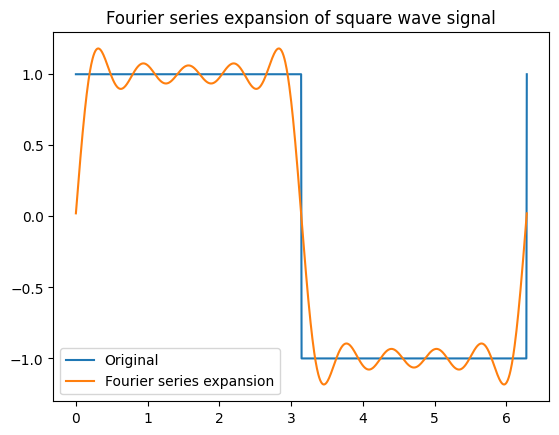

In [9]:
t = np.linspace(0, T, 1000)
N = 10
plt.plot(t, v(t), label='Original')
series, cns = complex_fourier_series_expansion(v, t, T, N)
plt.plot(t, series , label='Fourier series expansion')
plt.title('Fourier series expansion of square wave signal')
plt.legend()

Text(0, 0.5, 'magnitude cn')

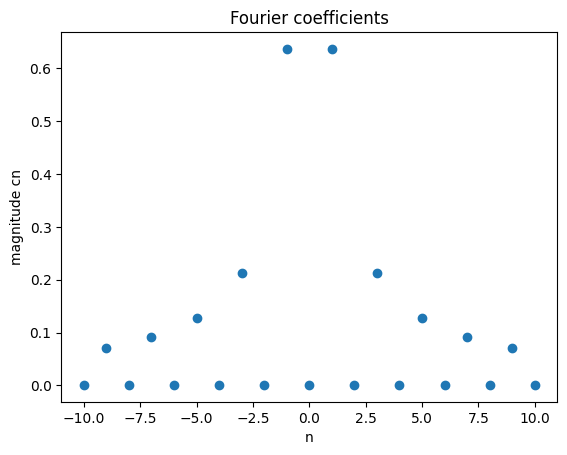

In [3]:
plt.scatter(np.arange(-N, N+1, 1), np.abs(cns))
plt.title('Fourier coefficients')
plt.xlabel('n')
plt.ylabel('magnitude cn')

## Physics Relationship

You might be wondering why we do this kind of deconstruction and what it is used for. It turns out that for many systems this kind of analysis tells you how energy, momentum, and other quantities might be distributed in the system. For example, the analogy to a complex quantum mechanical system might be the various occupied energy states of the system. The known frequencies could correspond to the energy levels of the system. The Fourier coefficients tell you how much of the system is in each energy state. There are many such analogies in physics; and many such transformations in multiple dimensions to extract this information. Fourier is just one of the most common.

## Decomposition Matching

We want to develop your intuition for this kind of analysis now that you have started to develop the tools to do it. So we will ask you to use your code to perform a few tasks. But these will start from the expected coefficients and ask you to find the signal. This is the reverse of what we have done so far. With your code you should be able to play and adjust the signal to match the coefficients qualitatively.

**&#9989; Do this**

Use your code to find the signal that matches the following coefficients:
1. No odd coefficients.
2. No even coefficients.
3. Only the $n=1$ coefficient.
4. Only the $n=2$ coefficient.
5. High values for low $n$ and low values for high $n$ (not too high).
6. Low values for low $n$ and high values for high $n$ (not too high).
7. Roughly equal values for all $n$.

In doing this, take note of the signals you are making. What are you doing to construct them to produce this kind of output. What kind of device or physical system might produce those signals?

Text(0, 0.5, 'magnitude cn')

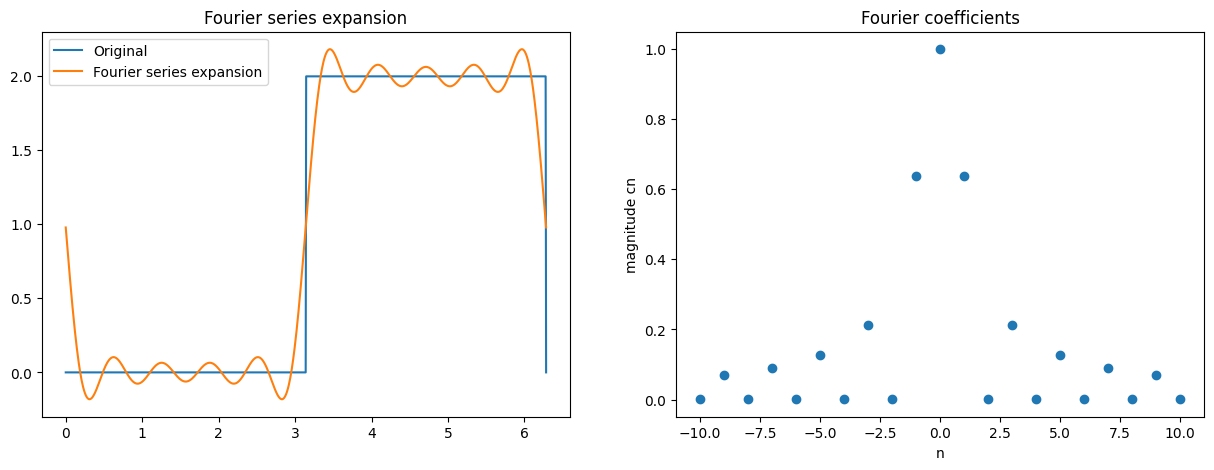

In [4]:
### your code here
def v(t):
    return -1*(square(t) - 1)
series, cns = complex_fourier_series_expansion(v, t, T, N)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t, v(t), label='Original')
plt.plot(t, series , label='Fourier series expansion')
plt.legend()
plt.title('Fourier series expansion')


plt.subplot(1,2,2)
plt.scatter(np.arange(-N, N+1, 1), np.abs(cns))

plt.title('Fourier coefficients')
plt.xlabel('n')
plt.ylabel('magnitude cn')